In [ ]:
import pandas as pd
import os, cv2, keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image, ImageDraw, ImageFont
from keras import layers

In [ ]:
from tqdm import tqdm

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip drive/MyDrive/cropped.zip

Streaming output truncated to the last 5000 lines.
  inflating: cropped/kanji_cropped/image_9140.jpg  
  inflating: cropped/kanji_cropped/image_9141.jpg  
  inflating: cropped/kanji_cropped/image_9142.jpg  
  inflating: cropped/kanji_cropped/image_9143.jpg  
  inflating: cropped/kanji_cropped/image_9144.jpg  
  inflating: cropped/kanji_cropped/image_9145.jpg  
  inflating: cropped/kanji_cropped/image_9146.jpg  
  inflating: cropped/kanji_cropped/image_9147.jpg  
  inflating: cropped/kanji_cropped/image_9148.jpg  
  inflating: cropped/kanji_cropped/image_9149.jpg  
  inflating: cropped/kanji_cropped/image_915.jpg  
  inflating: cropped/kanji_cropped/image_9150.jpg  
  inflating: cropped/kanji_cropped/image_9151.jpg  
  inflating: cropped/kanji_cropped/image_9152.jpg  
  inflating: cropped/kanji_cropped/image_9153.jpg  
  inflating: cropped/kanji_cropped/image_9154.jpg  
  inflating: cropped/kanji_cropped/image_9155.jpg  
  inflating: cropped/kanji_cropped/image_9156.jpg  
  inflating: c

In [ ]:
df = pd.read_csv('cropped/katakana_labels.csv')

In [ ]:
df

,image_id,labels
0,image_0,ケ
1,image_1,ケ
2,image_2,ケ
3,image_3,ケ
4,image_4,ノ
...,...,...
4036,image_4036,ア
4037,image_4037,ヤ
4038,image_4038,ト
4039,image_4039,ヲ


In [ ]:
X_=[]
y_=[]
for image_id, labels in df.values:
  image_fn = 'cropped/katakana_cropped/{}.jpg'.format(image_id)
  image = Image.open(image_fn)
  image = np.asarray(image)
  X_.append(image)
  y_.append(labels)

In [ ]:
X_ = np.array(X_)
y_ = np.array(y_)

In [ ]:
X_.shape

(4041, 100, 100)

In [ ]:
y_.shape

(4041,)

In [ ]:
title = y_[1839]

              ア


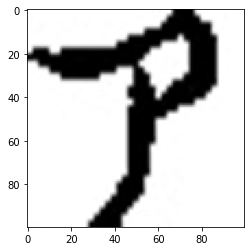

In [ ]:
plt.figure()
plt.imshow(X_[1839], 'gray')
print("             ",title)

In [ ]:
unique, counts = np.unique(y_, return_counts=True)

In [ ]:
i = 0
classes = []
for c in counts:
    if(c >= 4):
        cl = unique[i]
        classes.append(cl)
        print(cl)
    i+=1

ァ
ア
イ
ウ
エ
カ
ガ
ギ
ク
ケ
ゲ
コ
サ
シ
ス
ゼ
ソ
タ
ダ
チ
ッ
ツ
テ
デ
ト
ド
ナ
ニ
ネ
ノ
ハ
パ
ヒ
フ
プ
ヘ
ホ
マ
ム
メ
モ
ヤ
ヨ
ラ
リ
ル
レ
ヱ
ヲ
ン


In [ ]:
len(counts)

65

In [ ]:
unique

array(['ァ', 'ア', 'ィ', 'イ', 'ウ', 'エ', 'カ', 'ガ', 'キ', 'ギ', 'ク', 'ケ', 'ゲ',
       'コ', 'ゴ', 'サ', 'シ', 'ス', 'ズ', 'セ', 'ゼ', 'ソ', 'タ', 'ダ', 'チ', 'ッ',
       'ツ', 'ヅ', 'テ', 'デ', 'ト', 'ド', 'ナ', 'ニ', 'ネ', 'ノ', 'ハ', 'バ', 'パ',
       'ヒ', 'ピ', 'フ', 'プ', 'ヘ', 'ベ', 'ペ', 'ホ', 'ポ', 'マ', 'ミ', 'ム', 'メ',
       'モ', 'ヤ', 'ョ', 'ヨ', 'ラ', 'リ', 'ル', 'レ', 'ロ', 'ワ', 'ヱ', 'ヲ', 'ン'],
      dtype='<U1')

In [ ]:
len(classes)

50

In [ ]:
print(X_.shape)
print(y_.shape)

(4041, 100, 100)
(4041,)


In [ ]:
j = 0
yy1_ = []
XX1_ = []
for y in y_:
    if(y in classes):
        yy1_.append(y)
        XX1_.append(X_[j])
    j+= 1

In [ ]:
X_ = np.array(XX1_)
y_ = np.array(yy1_)

In [ ]:
print(X_.shape)
print(y_.shape)

(4018, 100, 100)
(4018,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn import metrics

from keras.models import Sequential, Model,load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, Conv3D, BatchNormalization, MaxPool2D, MaxPooling2D, AveragePooling2D, Input
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.callbacks import ModelCheckpoint
from datetime import datetime

from keras import backend as K

In [ ]:
leinst = LabelEncoder()
yyinst = leinst.fit_transform(y_)

# x_train, x_test, y_train, y_test = train_test_split(X_, yyinst, test_size=0.2, shuffle=True, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_, yyinst, test_size=0.2, shuffle=True, stratify=yyinst)

x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.5, shuffle=True, random_state=42)
# x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.5, shuffle=True, stratify=y_test)


print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)


num_classes = len(leinst.classes_)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
y_validation = to_categorical(y_validation, num_classes=num_classes)

(3214, 100, 100)
(402, 100, 100)
(402, 100, 100)


In [ ]:
num_classes

50

In [ ]:
K.clear_session()
def Kuzushiji_Classifier(in_):
    model_ = Conv2D(64,kernel_size=(3, 3),activation='relu')(in_)
    model_ = BatchNormalization()(model_)
    model_ = Conv2D(32,kernel_size=(3, 3),activation='relu')(model_)
    model_ = MaxPooling2D(pool_size=(2, 2))(model_)
    model_ = BatchNormalization()(model_)
    model_ = Dropout(0.4)(model_)
    
    model_ = Conv2D(32,kernel_size=(3, 3), strides=2,activation='relu')(model_)
    model_ = MaxPooling2D(pool_size=(2, 2))(model_)
    model_ = BatchNormalization()(model_)
    model_ = Dropout(0.4)(model_)
    
    model_ = Flatten()(model_)
    model_ = Dense(128, activation='relu')(model_)
    model_ = Dropout(0.4)(model_)
    model_ = Dense(num_classes, activation='softmax')(model_)
    return model_

In [ ]:
Input_Sample = Input(shape=(100, 100, 1))
Output_ = Kuzushiji_Classifier(Input_Sample)
Model_Enhancer = Model(inputs=Input_Sample, outputs=Output_)

In [ ]:
Model_Enhancer.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
Model_Enhancer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128   

In [ ]:
# checkpointer = ModelCheckpoint('model_Kuzushiji111.h5', verbose=0,mode='auto', monitor='val_accuracy',save_best_only=True)

In [ ]:
ModelHistory = Model_Enhancer.fit(x_train, y_train,
          batch_size=30,
          epochs=20,
          verbose=1,
          # callbacks=[checkpointer],
          validation_data=(x_validation, y_validation))

Epoch 1/20
108/108 [==============================] - 17s 39ms/step - loss: 1.7495 - accuracy: 0.6176 - val_loss: 1.0130 - val_accuracy: 0.7463
Epoch 2/20
108/108 [==============================] - 4s 32ms/step - loss: 0.7596 - accuracy: 0.8161 - val_loss: 0.5426 - val_accuracy: 0.8731
Epoch 3/20
108/108 [==============================] - 3s 32ms/step - loss: 0.4936 - accuracy: 0.8709 - val_loss: 0.4368 - val_accuracy: 0.8856
Epoch 4/20
108/108 [==============================] - 4s 34ms/step - loss: 0.3814 - accuracy: 0.8920 - val_loss: 0.4081 - val_accuracy: 0.8930
Epoch 5/20
108/108 [==============================] - 4s 33ms/step - loss: 0.2597 - accuracy: 0.9225 - val_loss: 0.3671 - val_accuracy: 0.9005
Epoch 6/20
108/108 [==============================] - 3s 32ms/step - loss: 0.2365 - accuracy: 0.9300 - val_loss: 0.3566 - val_accuracy: 0.9179
Epoch 7/20
108/108 [==============================] - 4s 33ms/step - loss: 0.1766 - accuracy: 0.9462 - val_loss: 0.3901 - val_accuracy: 0.908

In [ ]:
train_score = Model_Enhancer.evaluate(x_train, y_train, verbose=1)
print("Training Accuracy: ", train_score[1])

101/101 [==============================] - 1s 9ms/step - loss: 0.0073 - accuracy: 0.9988
Training Accuracy:  0.9987554550170898


In [ ]:
val_score = Model_Enhancer.evaluate(x_validation, y_validation, verbose=1)
print("Validation Accuracy: ", val_score[1])

13/13 [==============================] - 0s 21ms/step - loss: 0.3788 - accuracy: 0.9104
Validation Accuracy:  0.9104477763175964


In [ ]:
test_score = Model_Enhancer.evaluate(x_test, y_test, verbose=1)
print("Test Accuracy: ", test_score[1])

13/13 [==============================] - 0s 13ms/step - loss: 0.2392 - accuracy: 0.9453
Test Accuracy:  0.9452736377716064


In [ ]:
y_pred = Model_Enhancer.predict(x_test)

13/13 [==============================] - 0s 9ms/step


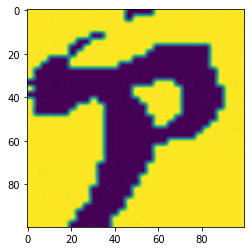

In [ ]:
# plt.figure(figsize=(15, 15))
plt.imshow(x_test[0], interpolation='lanczos')
plt.show()

In [ ]:
len(y_pred[0])

50

In [ ]:
i = np.argmax(y_pred[0])
print("Prediction: ", leinst.classes_[i])

Prediction:  ア


In [ ]:
i = np.argmax(y_test[0])
print("Prediction: ", leinst.classes_[i])

Prediction:  ア


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
y_true = np.argmax(y_test, axis=1)

In [ ]:
y_pr = np.argmax(y_pred, axis=1)

In [ ]:
f1 = f1_score(y_true, y_pr, average=None)

In [ ]:
len(f1)

38

In [ ]:
n = 0
labels = []
for clas in leinst.classes_:
  labels.append(n)
  # print(clas, n)
  n += 1

In [ ]:
report = classification_report(y_true, y_pr, labels=labels, target_names=leinst.classes_)
report_dict = classification_report(y_true, y_pr, labels=labels, target_names=leinst.classes_, output_dict=True)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
print(report)

              precision    recall  f1-score   support

           ァ       0.00      0.00      0.00         0
           ア       0.96      1.00      0.98        72
           イ       0.96      0.92      0.94        24
           ウ       0.95      1.00      0.97        19
           エ       0.00      0.00      0.00         1
           カ       0.00      0.00      0.00         1
           ガ       0.00      0.00      0.00         0
           ギ       1.00      1.00      1.00         1
           ク       0.00      0.00      0.00         0
           ケ       0.00      0.00      0.00         2
           ゲ       0.00      0.00      0.00         0
           コ       0.92      1.00      0.96        12
           サ       0.93      1.00      0.97        14
           シ       0.50      1.00      0.67         1
           ス       1.00      1.00      1.00         6
           ゼ       1.00      0.50      0.67         2
           ソ       1.00      0.80      0.89         5
           タ       0.00    

In [ ]:
for key in report_dict:
  r = report_dict[key]
  if r['support'] > 0:
    print(key, r['f1-score'], r['support'])

ア 0.9795918367346939 72
イ 0.9361702127659574 24
ウ 0.9743589743589743 19
エ 0.0 1
カ 0.0 1
ギ 1.0 1
ケ 0.0 2
コ 0.9600000000000001 12
サ 0.9655172413793104 14
シ 0.6666666666666666 1
ス 1.0 6
ゼ 0.6666666666666666 2
ソ 0.888888888888889 5
ッ 1.0 1
ツ 0.9230769230769231 19
テ 0.75 4
ト 0.9705882352941176 34
ド 1.0 2
ナ 0.972972972972973 19
ニ 0.9090909090909091 5
ネ 1.0 4
ノ 0.8 4
ハ 1.0 23
フ 0.8571428571428571 3
ヘ 1.0 3
ホ 1.0 3
マ 1.0 2
ム 1.0 8
メ 1.0 6
モ 0.7999999999999999 7
ヤ 0.9523809523809523 22
ヨ 0.9090909090909091 5
ラ 0.0 1
リ 0.75 4
レ 0.9142857142857143 19
ヱ 0.9714285714285714 18
ヲ 0.9696969696969697 17
ン 0.9 9
micro avg 0.945273631840796 402
macro avg 0.6277523100384411 402
weighted avg 0.9399872180833688 402


In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred

array([[1.09200695e-17, 2.65161476e-10, 3.18553654e-15, ...,
        3.63014697e-17, 5.57056639e-15, 9.99994159e-01],
       [5.87822913e-20, 8.43697437e-16, 3.64123641e-14, ...,
        8.67305955e-19, 3.15331507e-17, 3.91800822e-05],
       [2.89734402e-07, 9.99929547e-01, 7.45321813e-08, ...,
        7.93834403e-08, 1.88107151e-06, 2.92149007e-08],
       ...,
       [1.35141368e-20, 4.85033563e-13, 1.96143302e-09, ...,
        2.91259260e-17, 9.99998689e-01, 3.54953524e-17],
       [3.85282526e-08, 9.99754608e-01, 1.13251799e-08, ...,
        3.89936777e-10, 5.08827225e-06, 2.13016738e-09],
       [7.13381604e-17, 4.28902247e-10, 5.90247295e-11, ...,
        8.38064167e-12, 5.95013150e-10, 6.70404270e-13]], dtype=float32)

In [ ]:
f1

array([0.        , 0.92561983, 0.96      , 0.95652174, 0.        ,
       0.        , 0.92857143, 0.83333333, 0.85714286, 1.        ,
       0.44444444, 0.        , 0.66666667, 0.        , 0.8627451 ,
       0.94117647, 1.        , 1.        , 1.        , 0.84848485,
       0.8       , 0.83333333, 0.66666667, 0.96      , 0.        ,
       0.        , 0.        , 0.85714286, 0.85714286, 1.        ,
       0.85714286, 1.        , 0.94117647, 0.97674419, 0.5       ,
       1.        , 0.75      , 0.        , 0.96969697, 0.95652174,
       0.91428571, 0.82352941])